# ☁️ Cloud Deployment of Model

In this notebook, you will find all the necessary steps to deploy the model to the cloud using very simple-to-use Google Cloud no-code solutions (you can also do it with code using the GCP cloud SDK).

In [ ]:
# Import your trained model
import numpy as np
import pandas as pd

import tensorflow as tf
import keras

VERSION = '20240107184239'

In [7]:
features = ['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathroom_qty', 'bedrooms', 'beds', 'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'host_is_superhost_True',
       'host_verifications_work_email_1', 'host_has_profile_pic_True',
       'neighbourhood_cleansed_azcapotzalco',
       'neighbourhood_cleansed_benito_juarez',
       'neighbourhood_cleansed_coyoacan',
       'neighbourhood_cleansed_cuajimalpa_de_morelos',
       'neighbourhood_cleansed_cuauhtemoc',
       'neighbourhood_cleansed_gustavo_a._madero',
       'neighbourhood_cleansed_iztacalco', 'neighbourhood_cleansed_iztapalapa',
       'neighbourhood_cleansed_la_magdalena_contreras',
       'neighbourhood_cleansed_miguel_hidalgo',
       'neighbourhood_cleansed_milpa_alta', 'neighbourhood_cleansed_tlahuac',
       'neighbourhood_cleansed_tlalpan',
       'neighbourhood_cleansed_venustiano_carranza',
       'neighbourhood_cleansed_xochimilco', 'room_type_hotel_room',
       'room_type_private_room', 'room_type_shared_room',
       'property_description_barn', 'property_description_bed_and_breakfast',
       'property_description_boutique_hotel', 'property_description_bungalow',
       'property_description_cabin', 'property_description_campsite',
       'property_description_casa_particular', 'property_description_castle',
       'property_description_chalet', 'property_description_condo',
       'property_description_cottage', 'property_description_dome',
       'property_description_dorm', 'property_description_earthen_home',
       'property_description_farm_stay', 'property_description_guest_suite',
       'property_description_guesthouse', 'property_description_holiday_park',
       'property_description_home', 'property_description_home/apt',
       'property_description_hostel', 'property_description_hotel',
       'property_description_houseboat', 'property_description_hut',
       'property_description_in-law', 'property_description_loft',
       'property_description_nature_lodge', 'property_description_pension',
       'property_description_place', 'property_description_private_room',
       'property_description_ranch', 'property_description_rental_unit',
       'property_description_serviced_apartment',
       'property_description_shared_room',
       'property_description_shipping_container', 'property_description_tent',
       'property_description_tiny_home', 'property_description_tipi',
       'property_description_tower', 'property_description_townhouse',
       'property_description_treehouse', 'property_description_vacation_home',
       'property_description_villa', 'bathroom_type_private_bath',
       'bathroom_type_shared_bath', 'gym_1', 'pool_1', 'kitchen_1',
       'parking_1', 'washer_1', 'dryer_1', 'conditioning_1', 'heating_1',
       'workspace_1', 'tv_1', 'hair dryer_1', 'iron_1', 'hot tub_1', 'crib_1',
       'bbq_1', 'fireplace_1', 'smoking_1', 'coffee maker_1',
       'instant_bookable_True']

In [8]:
numerical = [
            'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count',
            'accommodates', 'bathroom_qty', 'bedrooms', 'beds',
            ]
geo = ['latitude','longitude']
categorical = [
                'host_response_time','host_is_superhost', 
                'host_verifications_work_email','host_has_profile_pic',
                'neighbourhood_cleansed', 'room_type', 'property_description', 'bathroom_type', 
                'gym','pool','kitchen','parking','washer','dryer','conditioning','heating','workspace',
                'tv','hair dryer','iron','hot tub','crib','bbq','fireplace','smoking', 'coffee maker', 
               'instant_bookable',
              ]
label=['log_price']
complete_categorical=[i for i in features if i not in geo+numerical]

In [4]:
model = keras.models.load_model(f'../models/v_{VERSION}/model.keras', safe_mode=False)

In [9]:
# Save model in a format that GCP Vertex AI model registry can import (pb format):
!mkdir -p saved_model
model.save('saved_model/')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [13]:
# TO GCS:
# model.save(f'gs://dz-ml-airbnb-pricing-mx/models/v_{VERSION}/')

INFO:tensorflow:Assets written to: gs://dz-ml-airbnb-pricing-mx/models/v_20240107184239/assets


INFO:tensorflow:Assets written to: gs://dz-ml-airbnb-pricing-mx/models/v_20240107184239/assets


In [17]:
# Programatically register and deploy model (skip these steps to see how to do it using the UI)
# from google.cloud import aiplatform
#
# aiplatform.init()
#
# model = aiplatform.Model.upload(
#     display_name='tf-airbnb-pricing-mx',
#     description='Tensorflow model to predict Airbnb prices in Mexico City',
#     serving_container_image_uri='us-docker.pkg.dev/vertex-ai/prediction/tf2-cpu.2-13:latest',
#     artifact_uri=f'gs://dz-ml-airbnb-pricing-mx/models/',
#     location='us-central1'
# )
# 
# model.wait()
# 
# print(model.display_name)
# print(model.resource_name)
# print(model.uri)

tf-airbnb-pricing-mx
projects/860047570819/locations/us-central1/models/6630176061768335360
gs://dz-ml-airbnb-pricing-mx/models/


In [20]:
# endpoint = aiplatform.Endpoint.create(
#     display_name='airbnb-pricing-mx',
#     description='Online predictions to obtain price of an Airbnb unit in mexico city given its characteristics',
# )
# 
# endpoint.wait()
# 
# model.deploy(
#     endpoint=endpoint,
#     # model_name = '6630176061768335360',
#     machine_type = 'n1-standard-4',
# )
#  
# print(endpoint.display_name)
# print(endpoint.resource_name)

INFO:google.cloud.aiplatform.models:Deploying model to Endpoint : projects/860047570819/locations/us-central1/endpoints/3224482775197286400
INFO:google.cloud.aiplatform.models:Deploy Endpoint model backing LRO: projects/860047570819/locations/us-central1/endpoints/3224482775197286400/operations/1267646678152773632
INFO:google.cloud.aiplatform.models:Endpoint model deployed. Resource name: projects/860047570819/locations/us-central1/endpoints/3224482775197286400


airbnb-pricing-mx
projects/860047570819/locations/us-central1/endpoints/3224482775197286400


For the sake of time, we will do the next steps using the GCP Cloud Console, but you can also do this programmatically.

> Make sure to have a [GCP project created](https://developers.google.com/workspace/guides/create-project).

First you need to create a Google Cloud Storage bucket where you'll upload, first, the "my_model" folder:
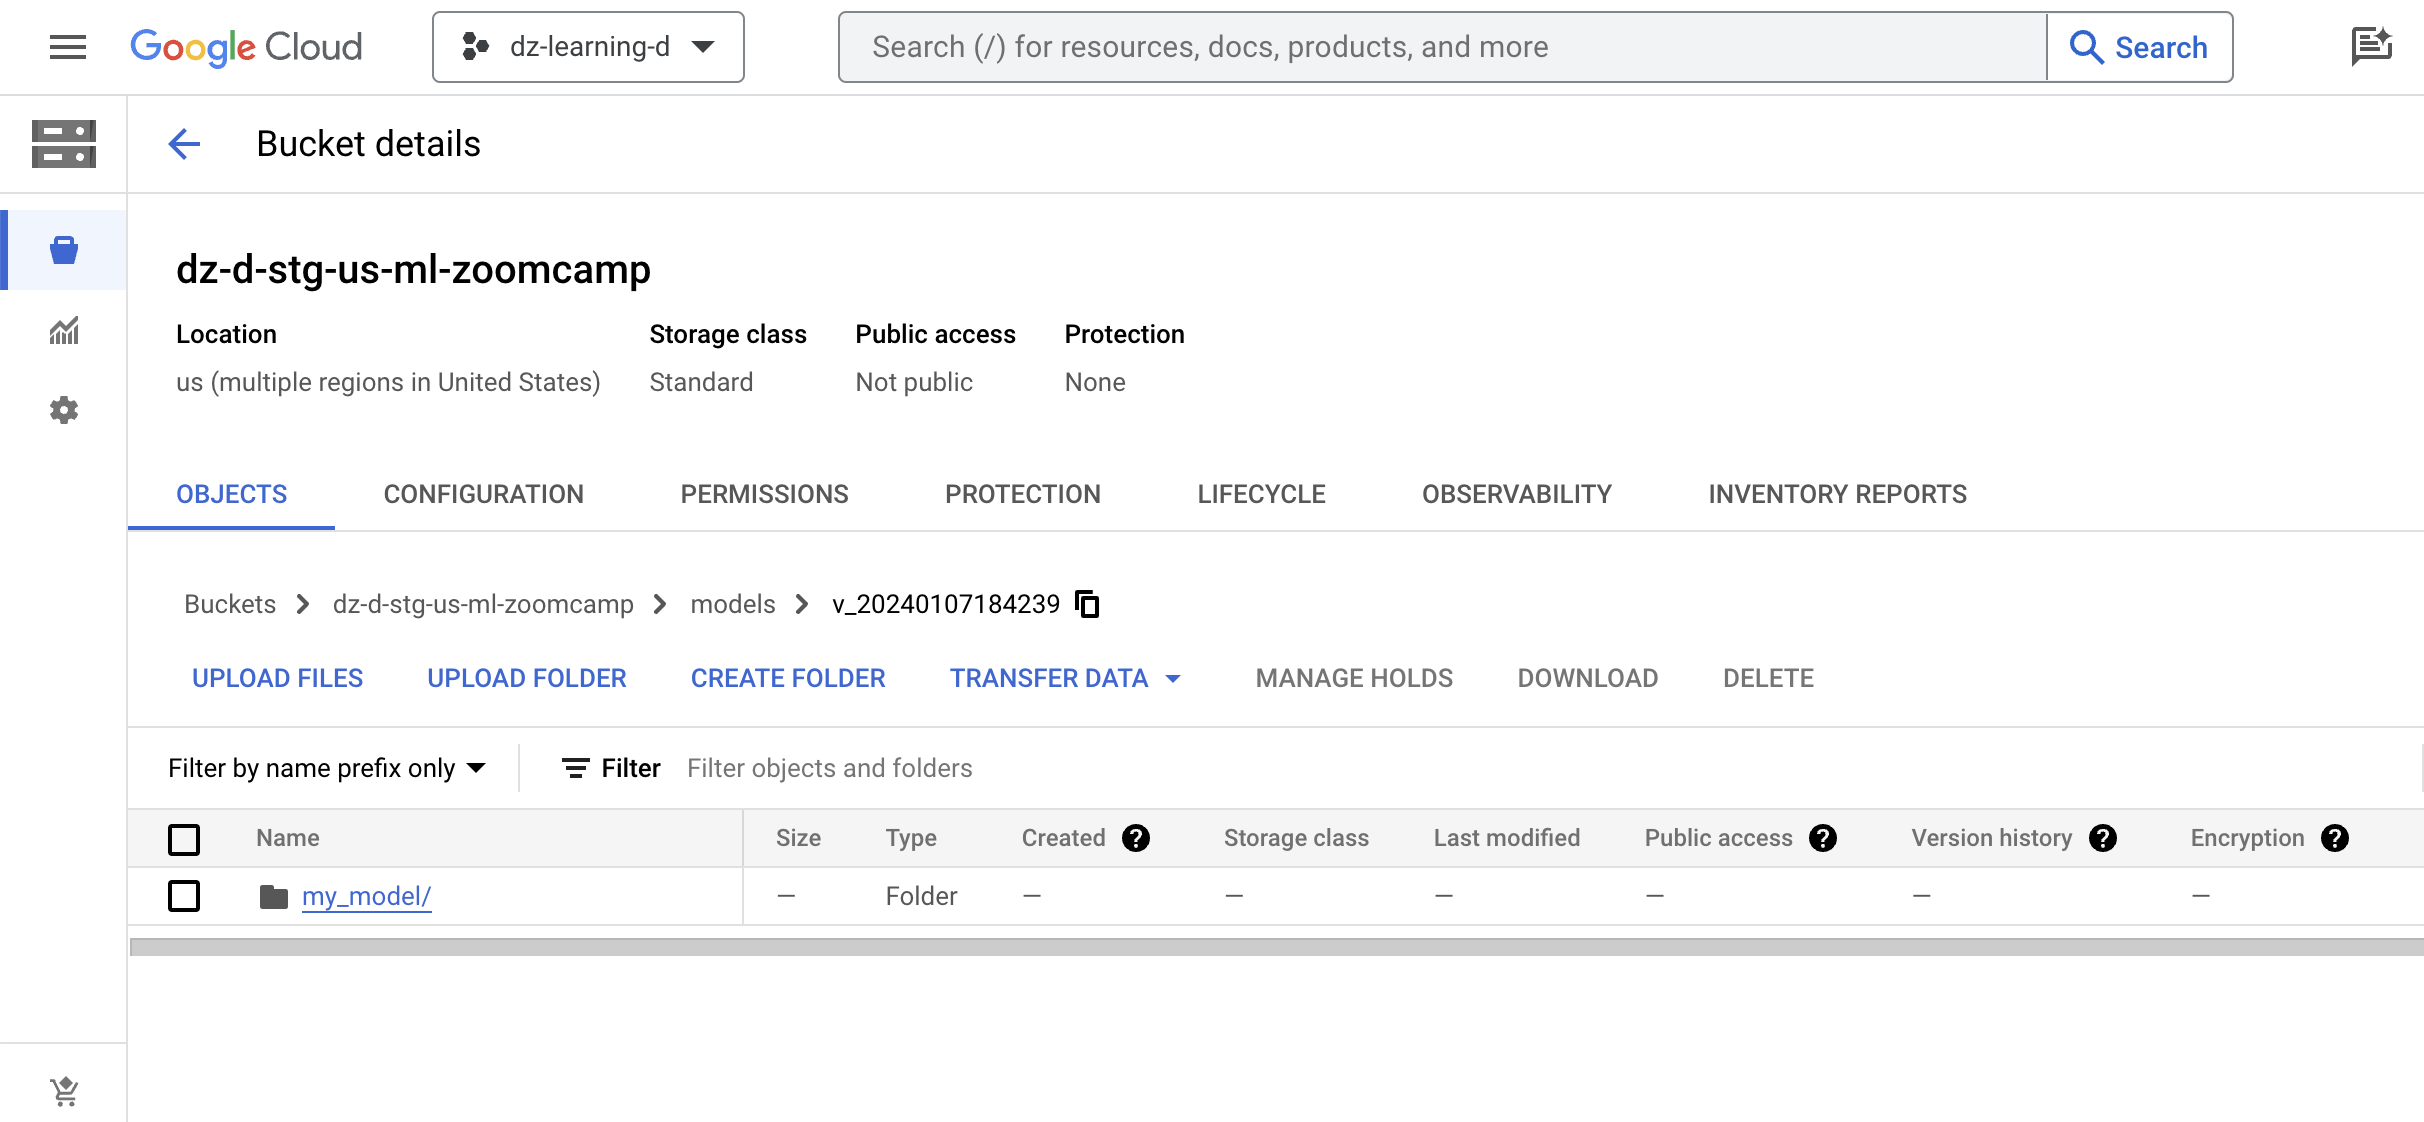

From here, you can you to Vertex AI model registry and import your already trained model (Model Registry allows you to import models from known frameworks as Tensorflow, Pytorch, etc):
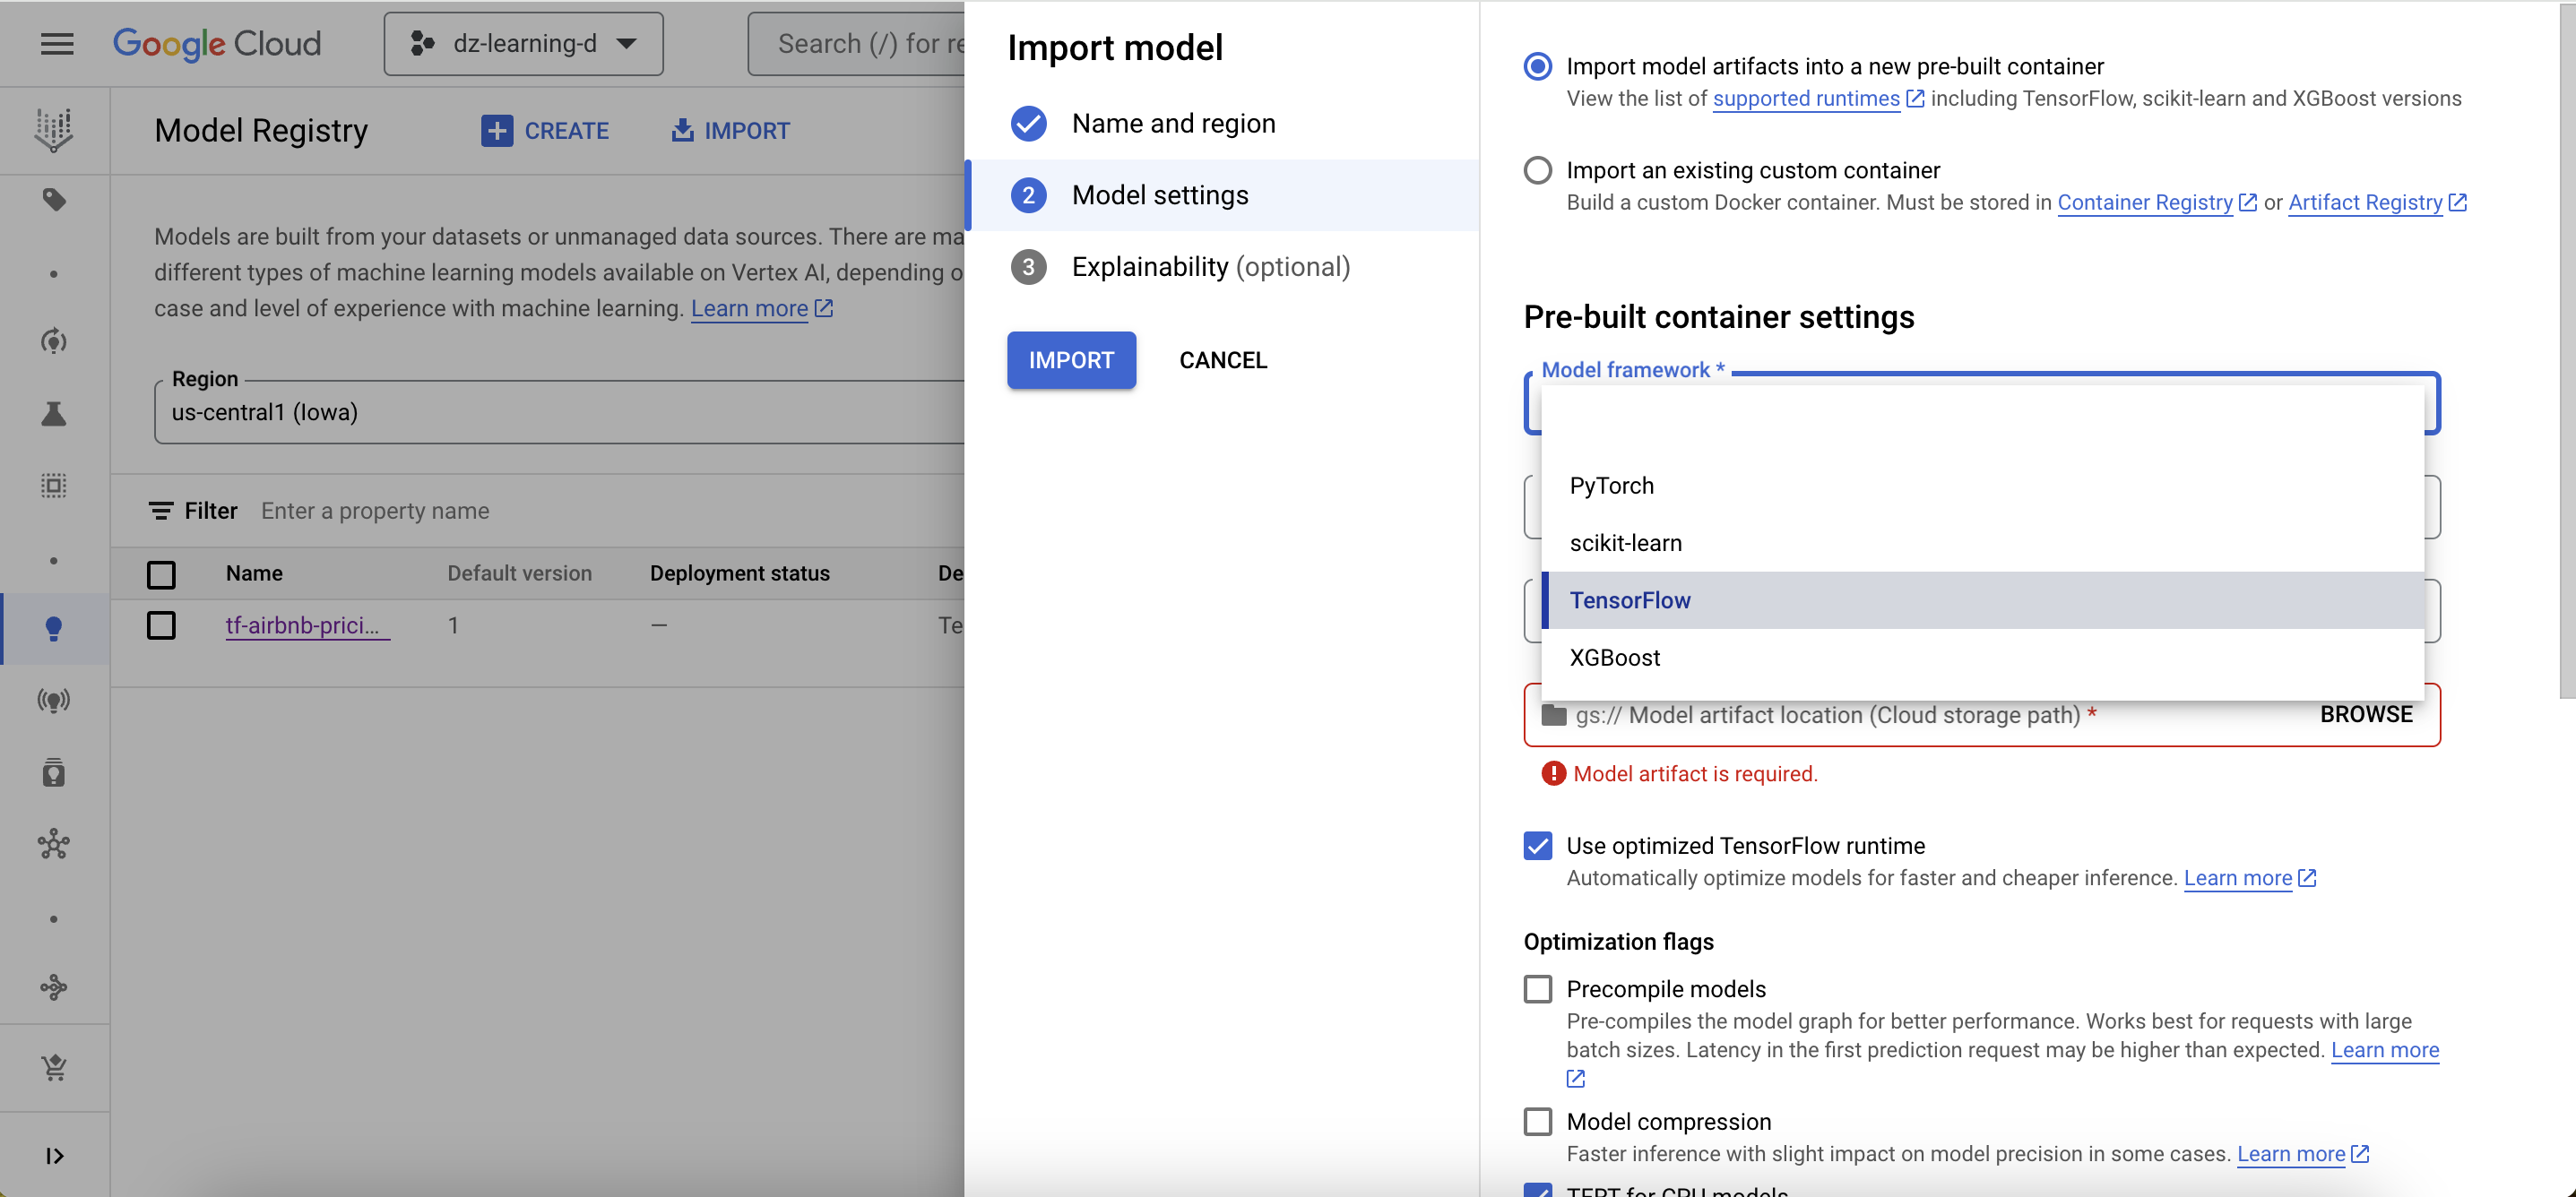

Your model is ready! 

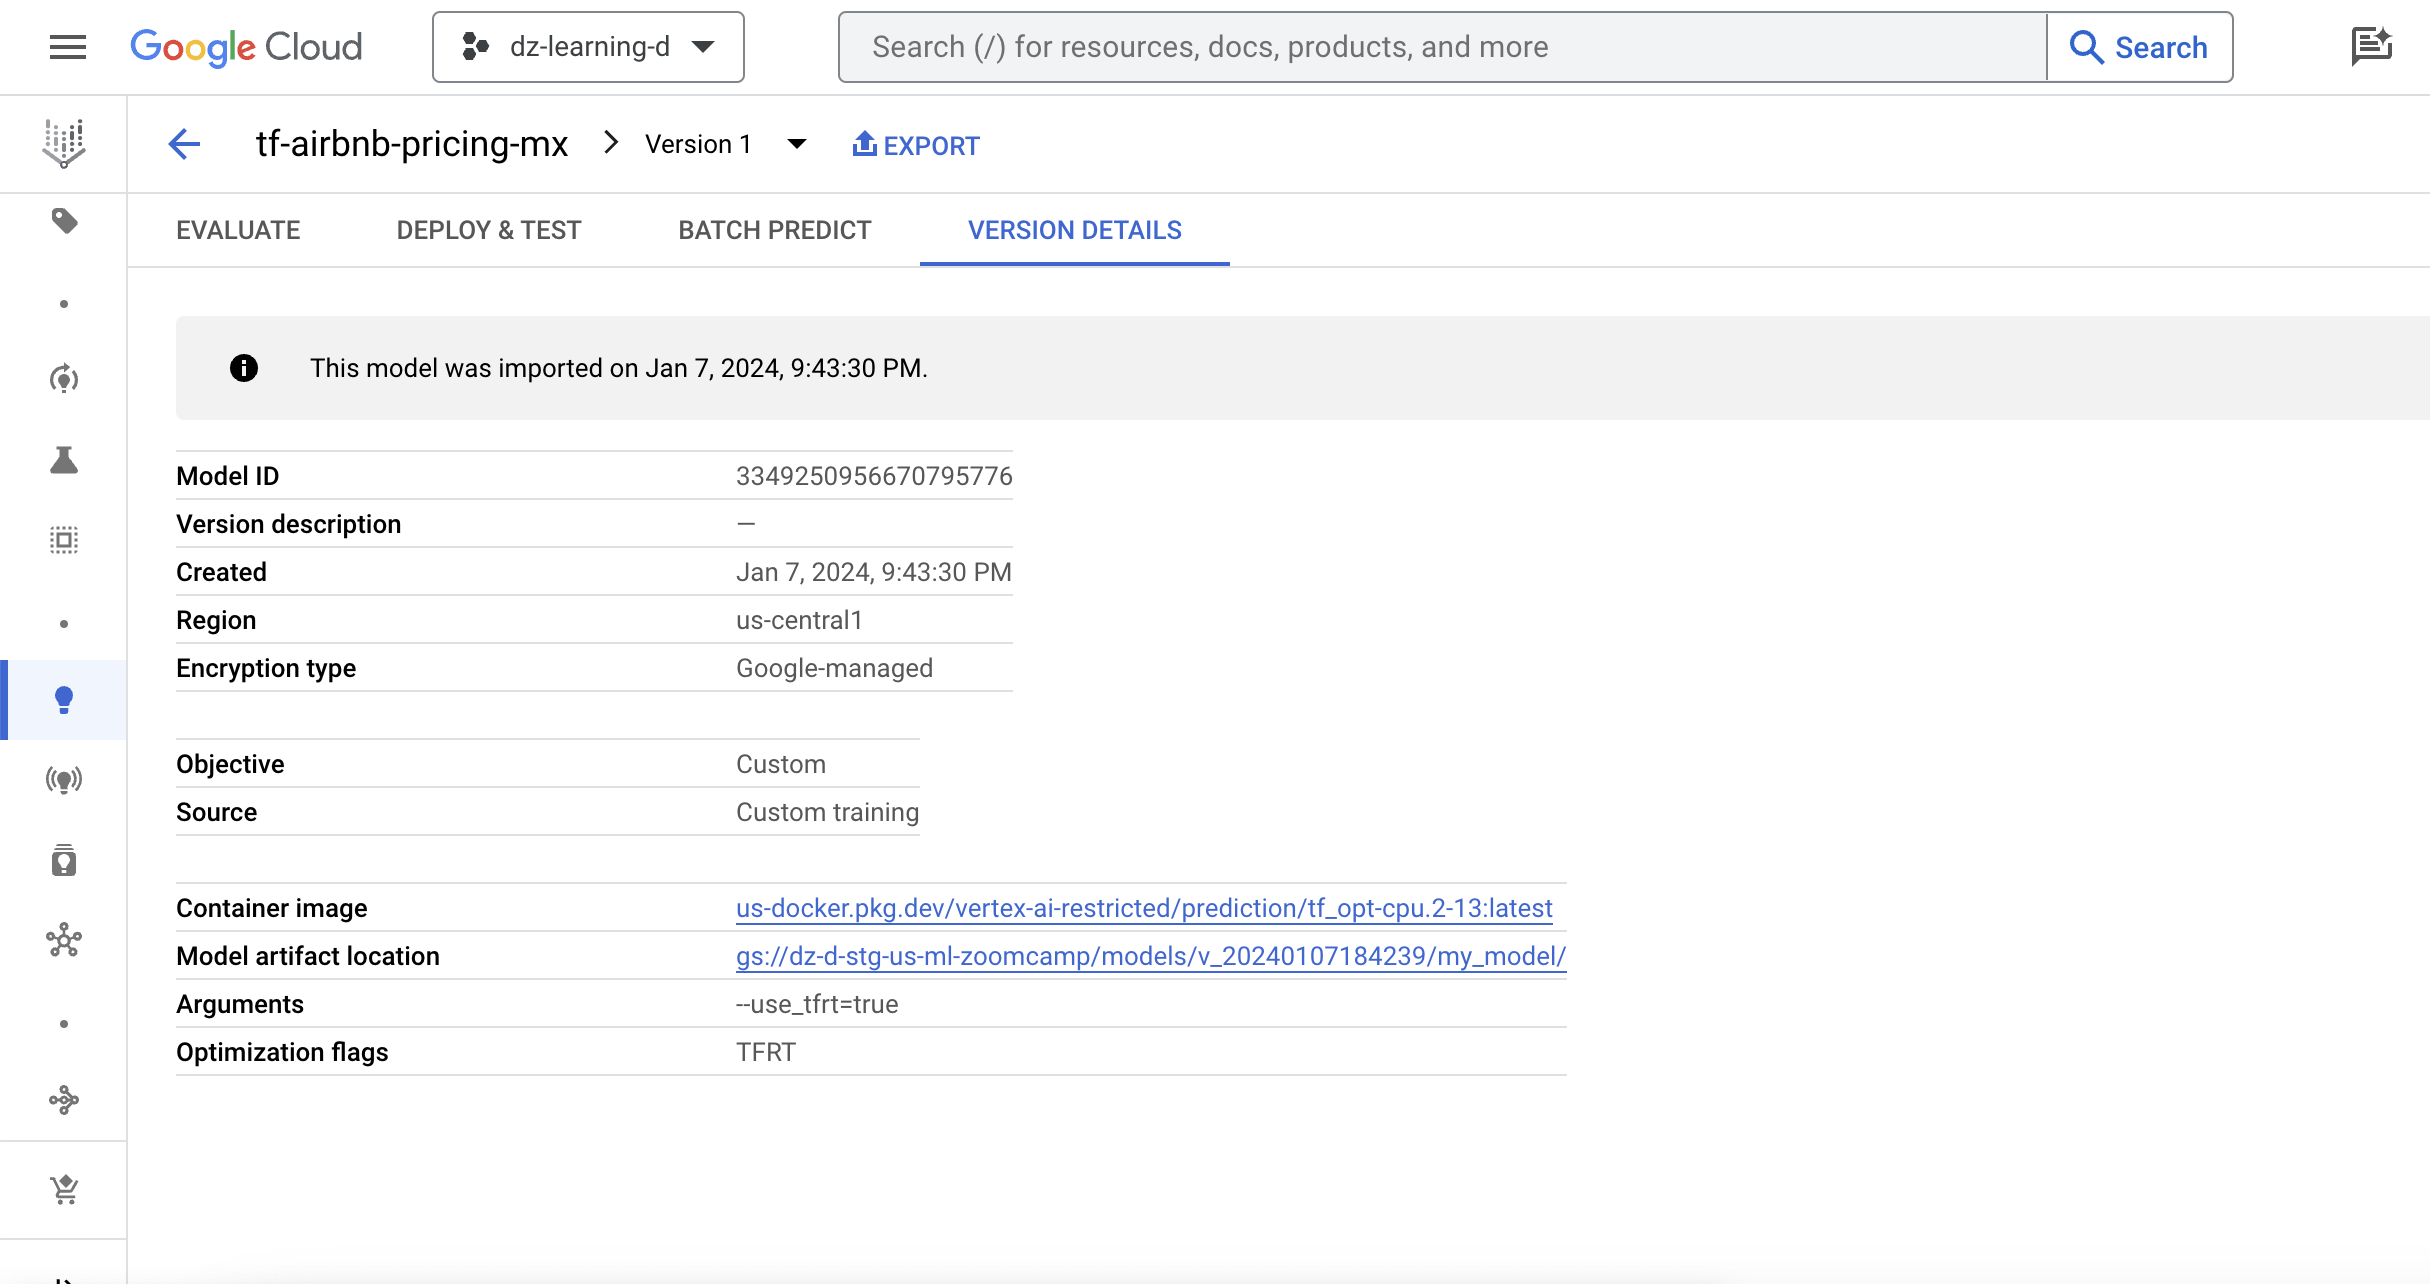

Now, you can deploy it to an endpoint to access it from other services (like a Streamlit app for example). Or directly request batch predictions from this registered model. Let's first do the later (**batch prediction request**):

In [ ]:
# First we need to prepare our example for batch predictions:
example = {
    'host_response_rate': [.98], # My grandparents respond 98% of the time
     'host_acceptance_rate': [ 1], # Right now they always accept new guests
     'host_total_listings_count': [ 4], # They have 4 units
     'latitude': [ 19.37137], # ...
     'longitude': [ -99.19327],
     'accommodates': [ 4],
     'bathroom_qty': [ 2],
     'bedrooms': [ 2],
     'beds': [ 3],
    'host_response_time':['within_a_day'],
    'host_is_superhost': [False],
    'host_verifications_work_email':[0],
    'host_has_profile_pic': [True],
    'neighbourhood_cleansed': ['alvaro_obregon'],
    'room_type': ['entire_home_apt'],
    'property_description': ['home/apt'],
    'bathroom_type':['private_bath'],
     'gym': [0],
     'pool': [0],
     'kitchen': [1],
     'parking': [1],
     'washer': [1],
     'dryer': [1],
     'conditioning': [0],
     'heating': [0],
     'workspace': [0],
     'tv': [1],
     'hair dryer': [0],
     'iron': [1],
     'hot tub': [0],
     'crib': [0],
     'bbq': [0],
     'fireplace': [0],
     'smoking': [0],
     'coffee maker': [1],
     'instant_bookable': ['True'],
    
}
example_df = pd.DataFrame.from_dict(example)

# 1. Apply pd.get_dummies to the example_df
example_df = pd.get_dummies(example_df, columns=categorical, drop_first=False)

# 2. . Add missing columns to example_df
missing_cols = set(features) - set(example_df.columns)
for col in missing_cols:
    example_df[col] = 0

# 3. Ensure the order of columns is the same as in 'data'
example_df = example_df[features]

# 4. Reformat
example_df=example_df.astype('float32')

# 5. Order for predictions:
test_features_ordered = example_df[geo+numerical+complete_categorical]

test_features_ordered.head()

In [10]:
# Save in supported format for batch predictions (you can also have more examples in you dataframe, not just one):
test_features_ordered.to_csv('example.csv', index=False)

Now, you just need to upload your data to a GCS bucket:
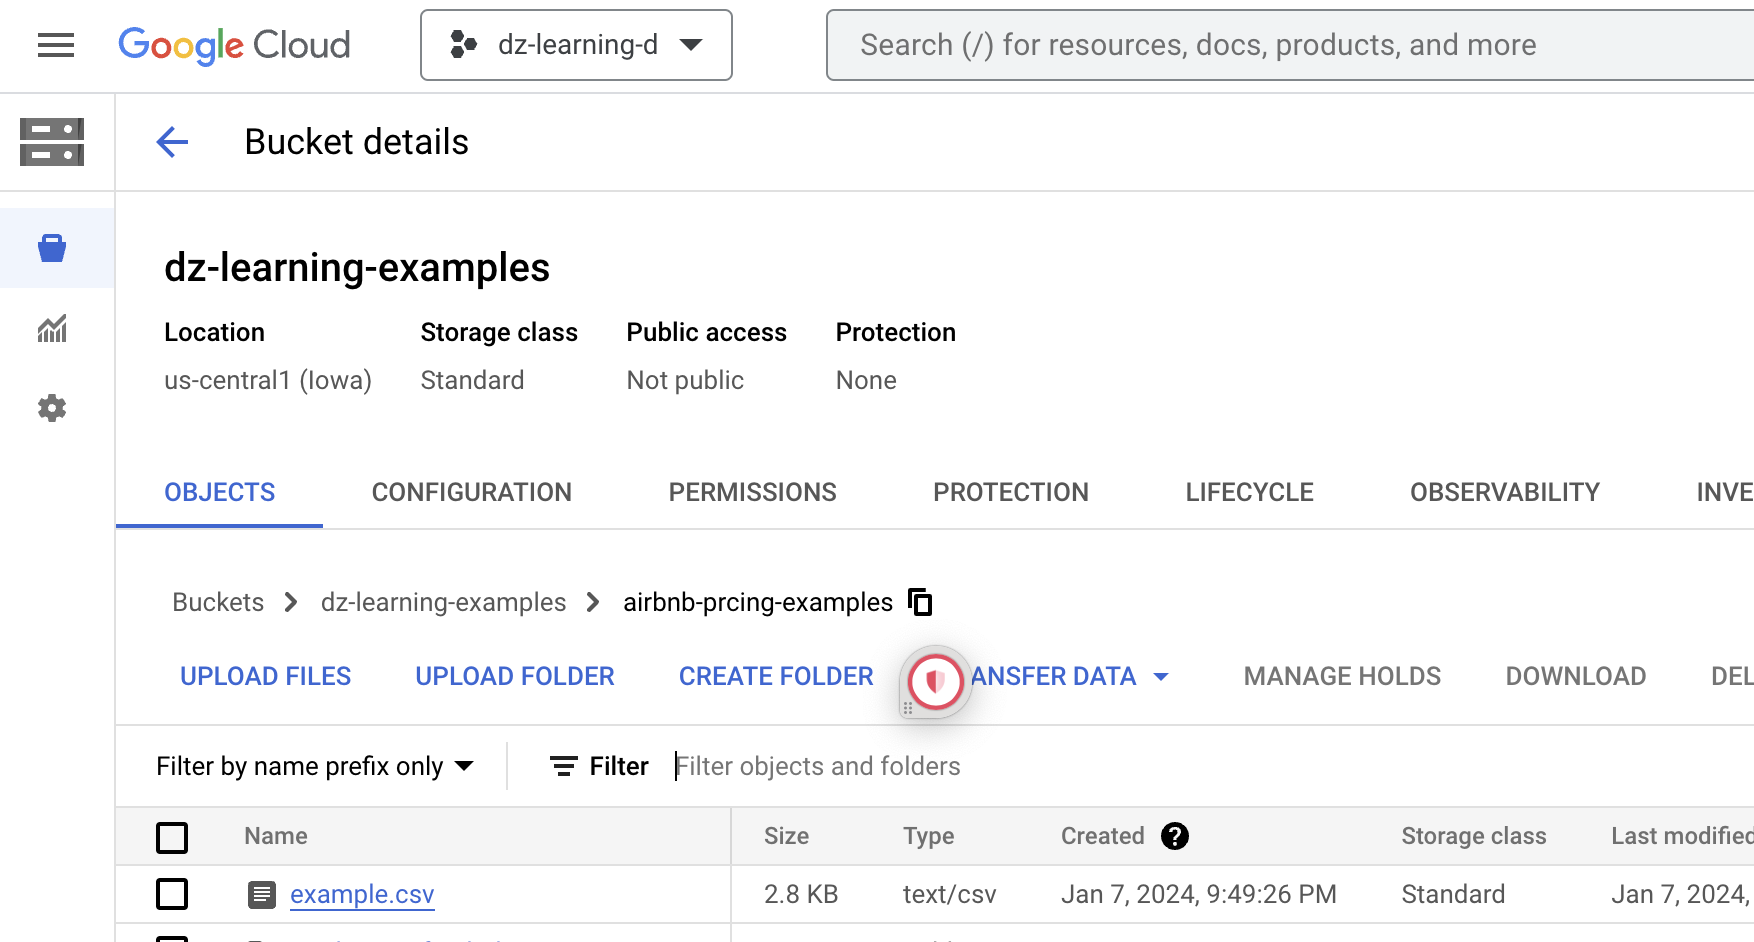

And then provide the example data to the model to predict on it:
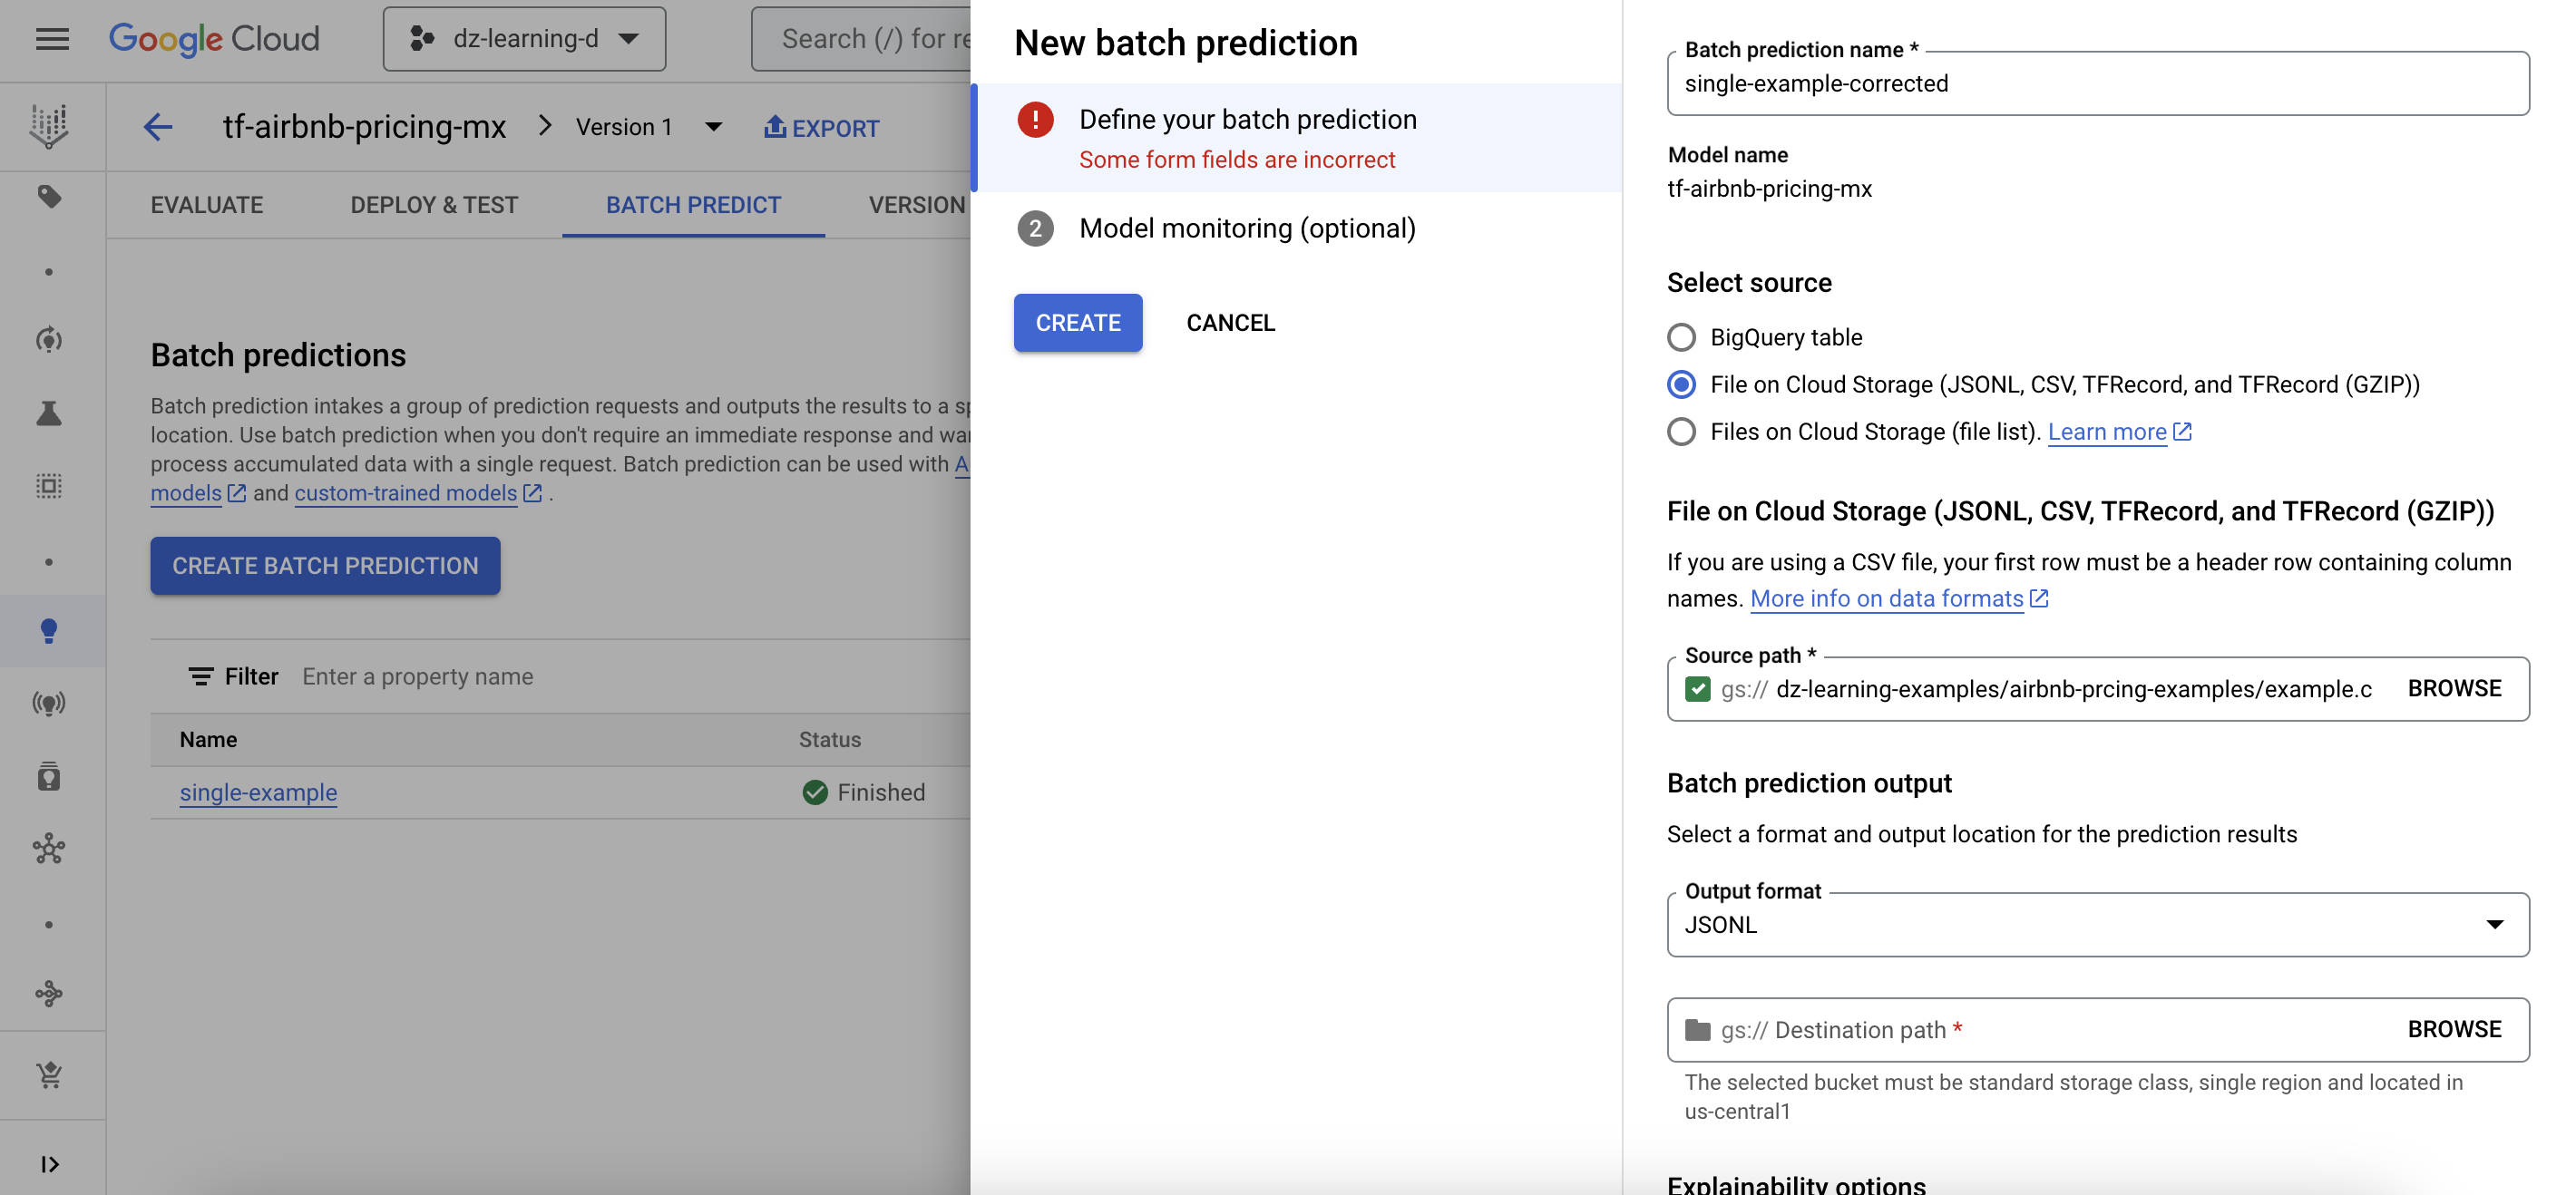

That's how you can easily start obtaining predictions from your model:
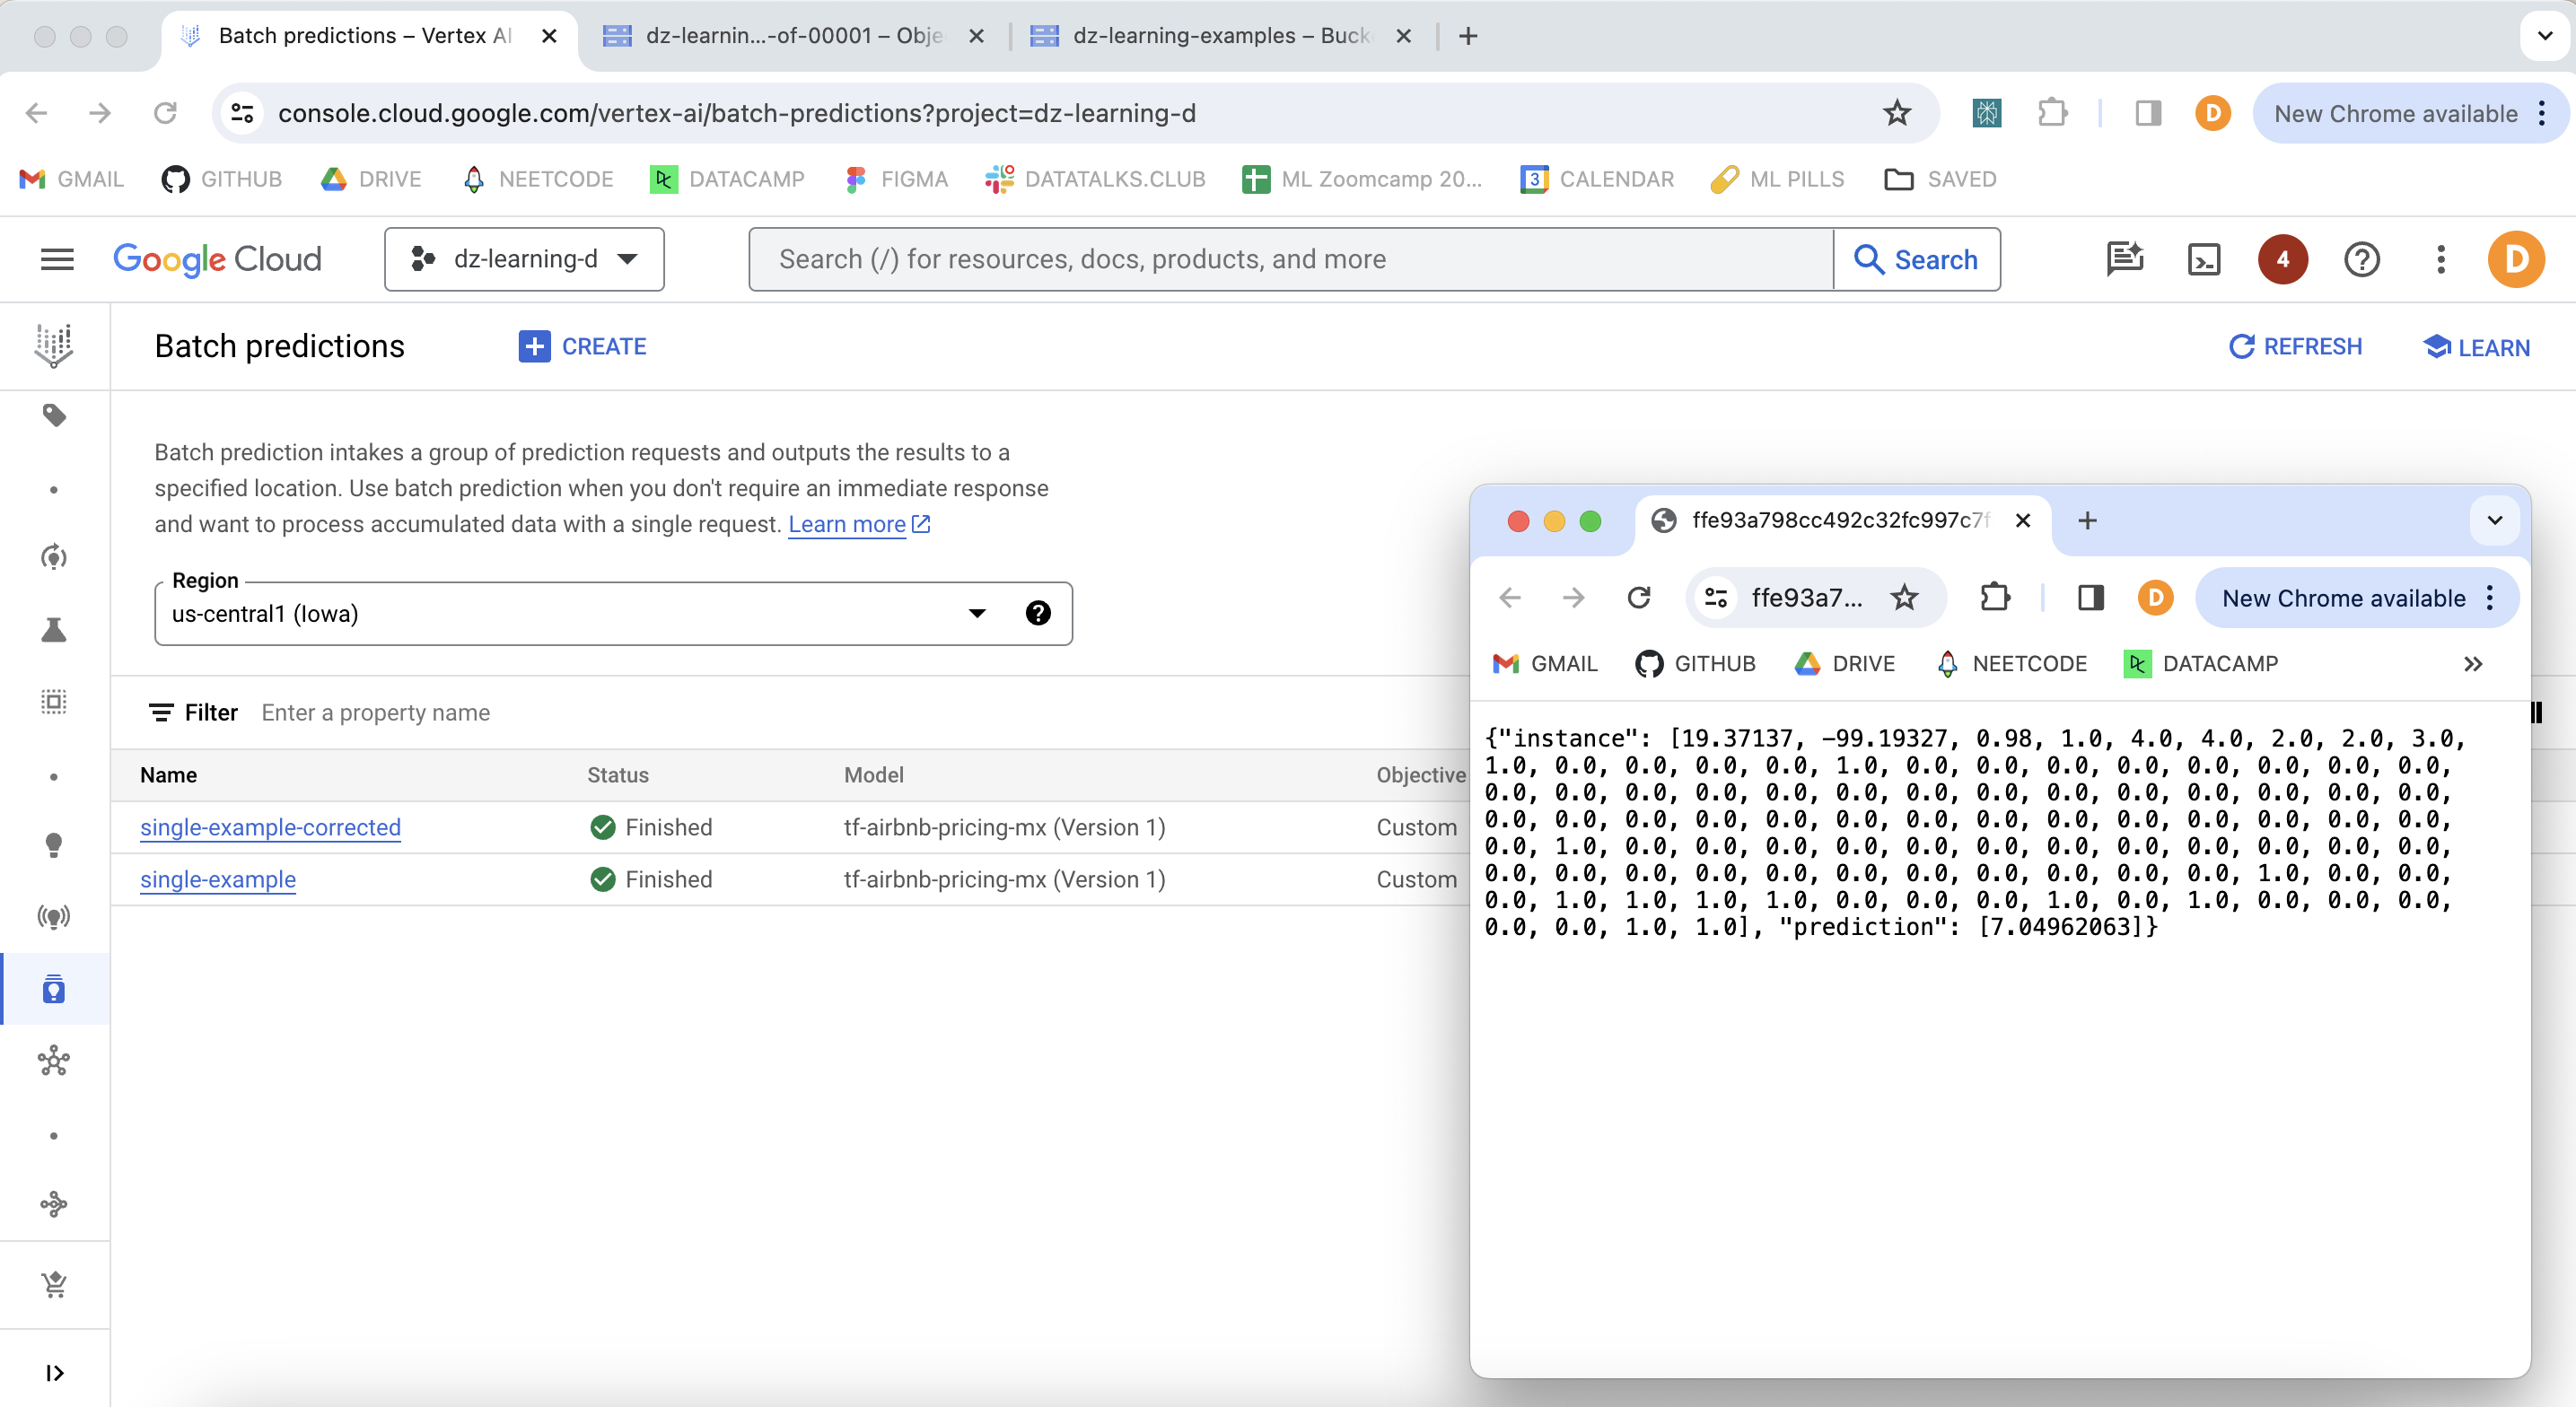

But, what happens if we have a service like our streamlit app that would need to make predictions to an online endpoint (live)? For this, we have the Vertex endpoint service and deploying a registered model is as simple as just selecting the configurations of your service and deploying it:

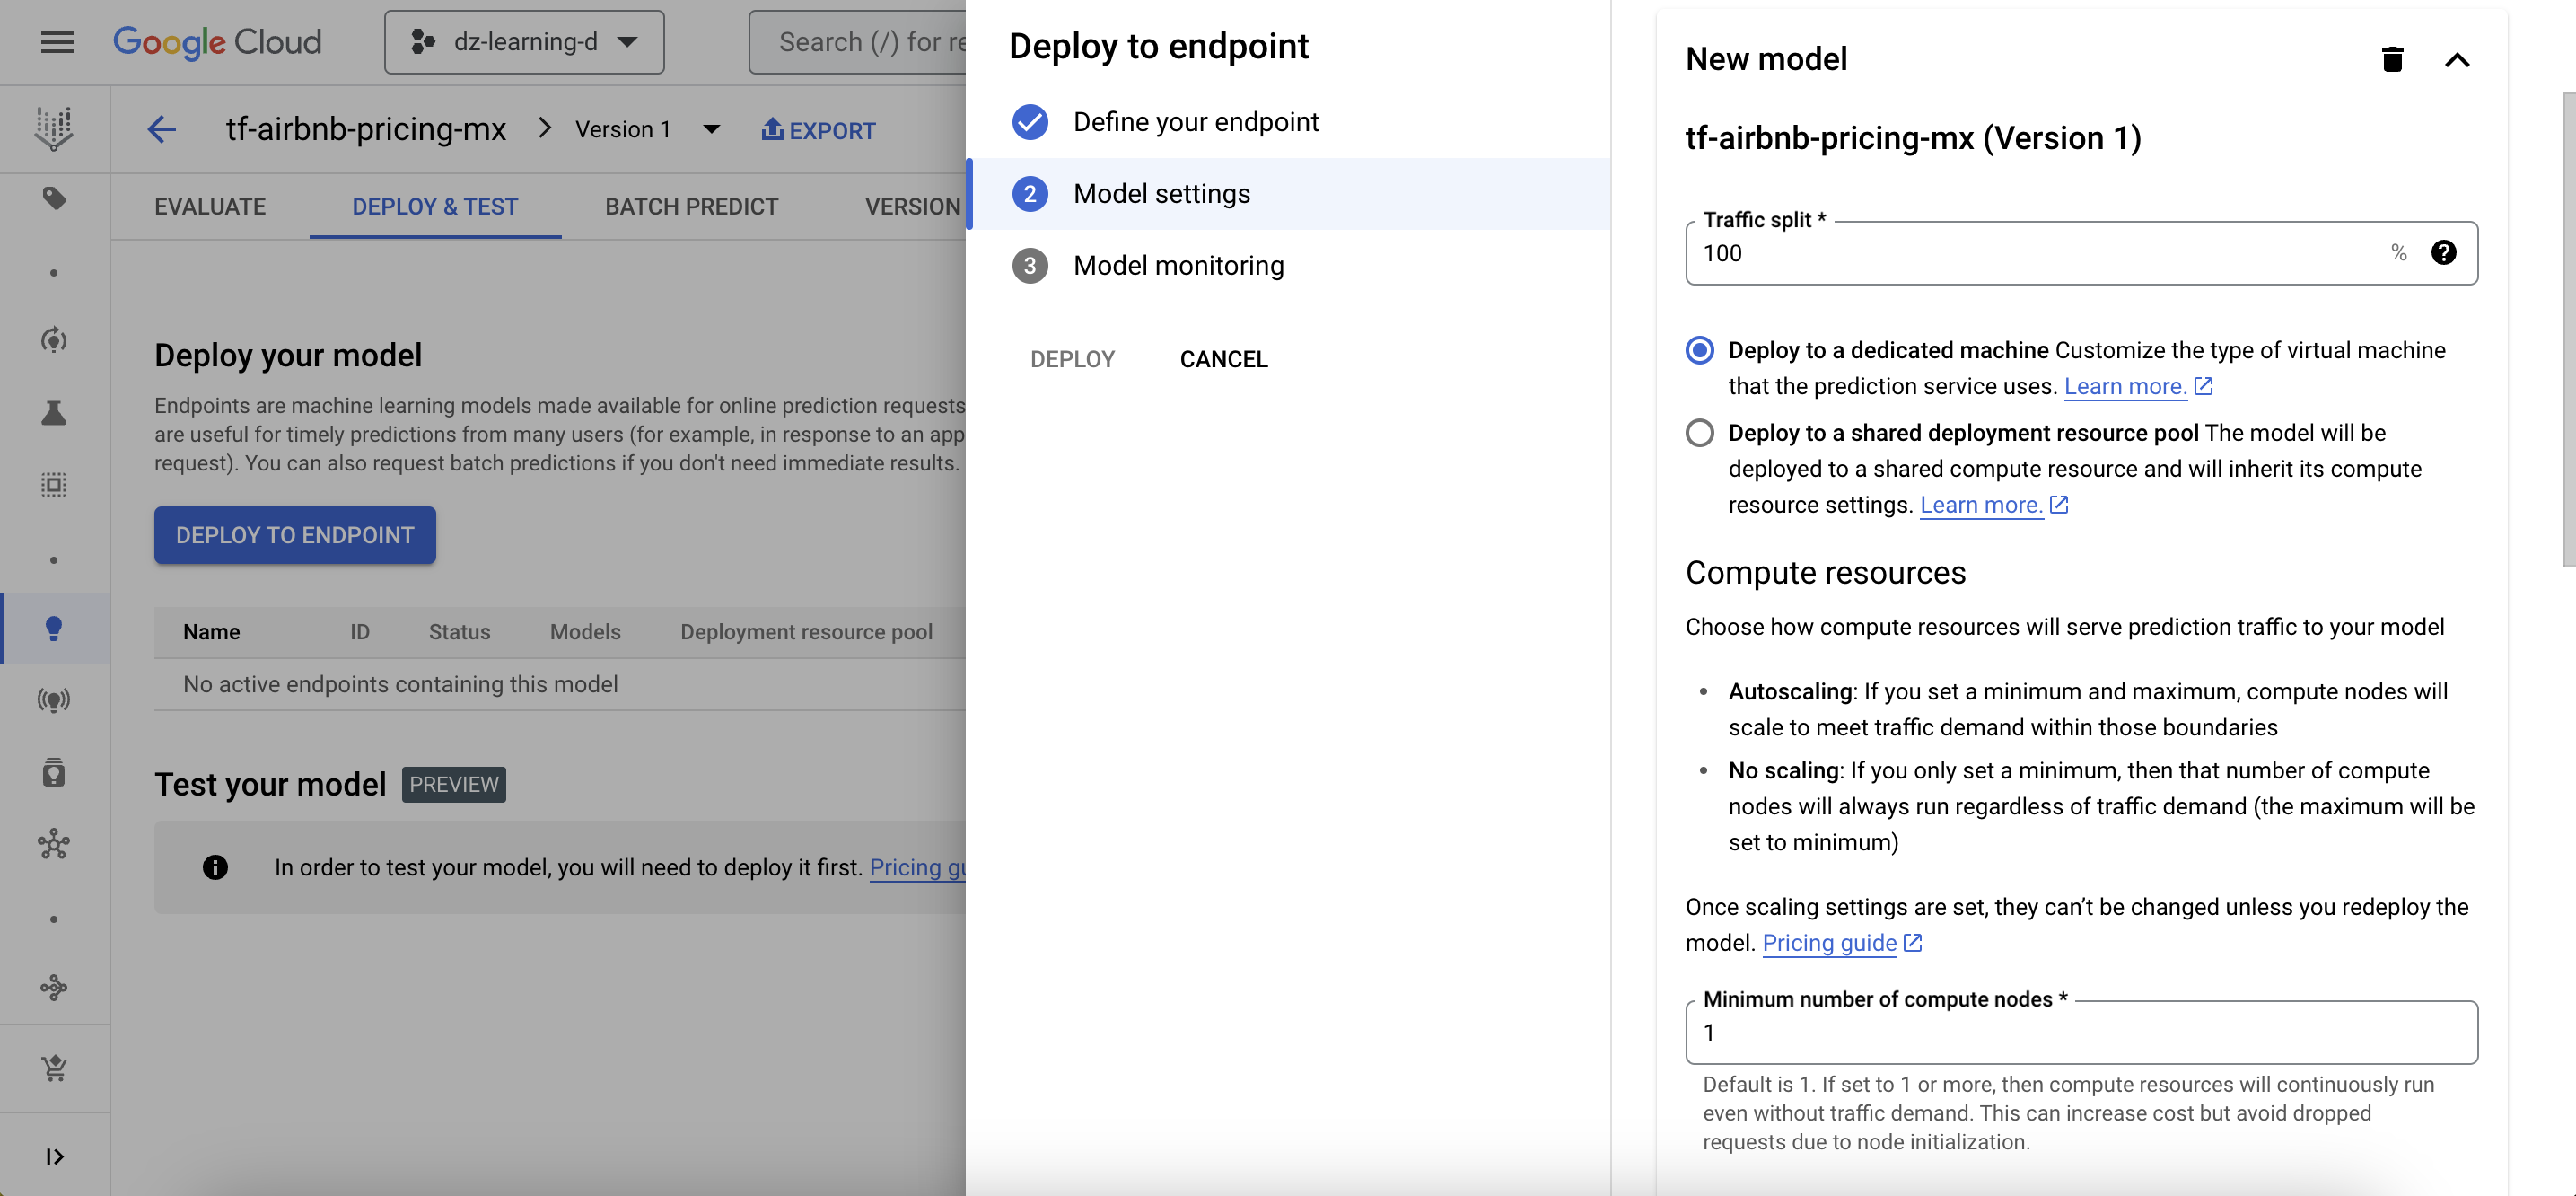

Once your model is up, you can make requests from other services like a Cloud run app with the Streamlit image. 

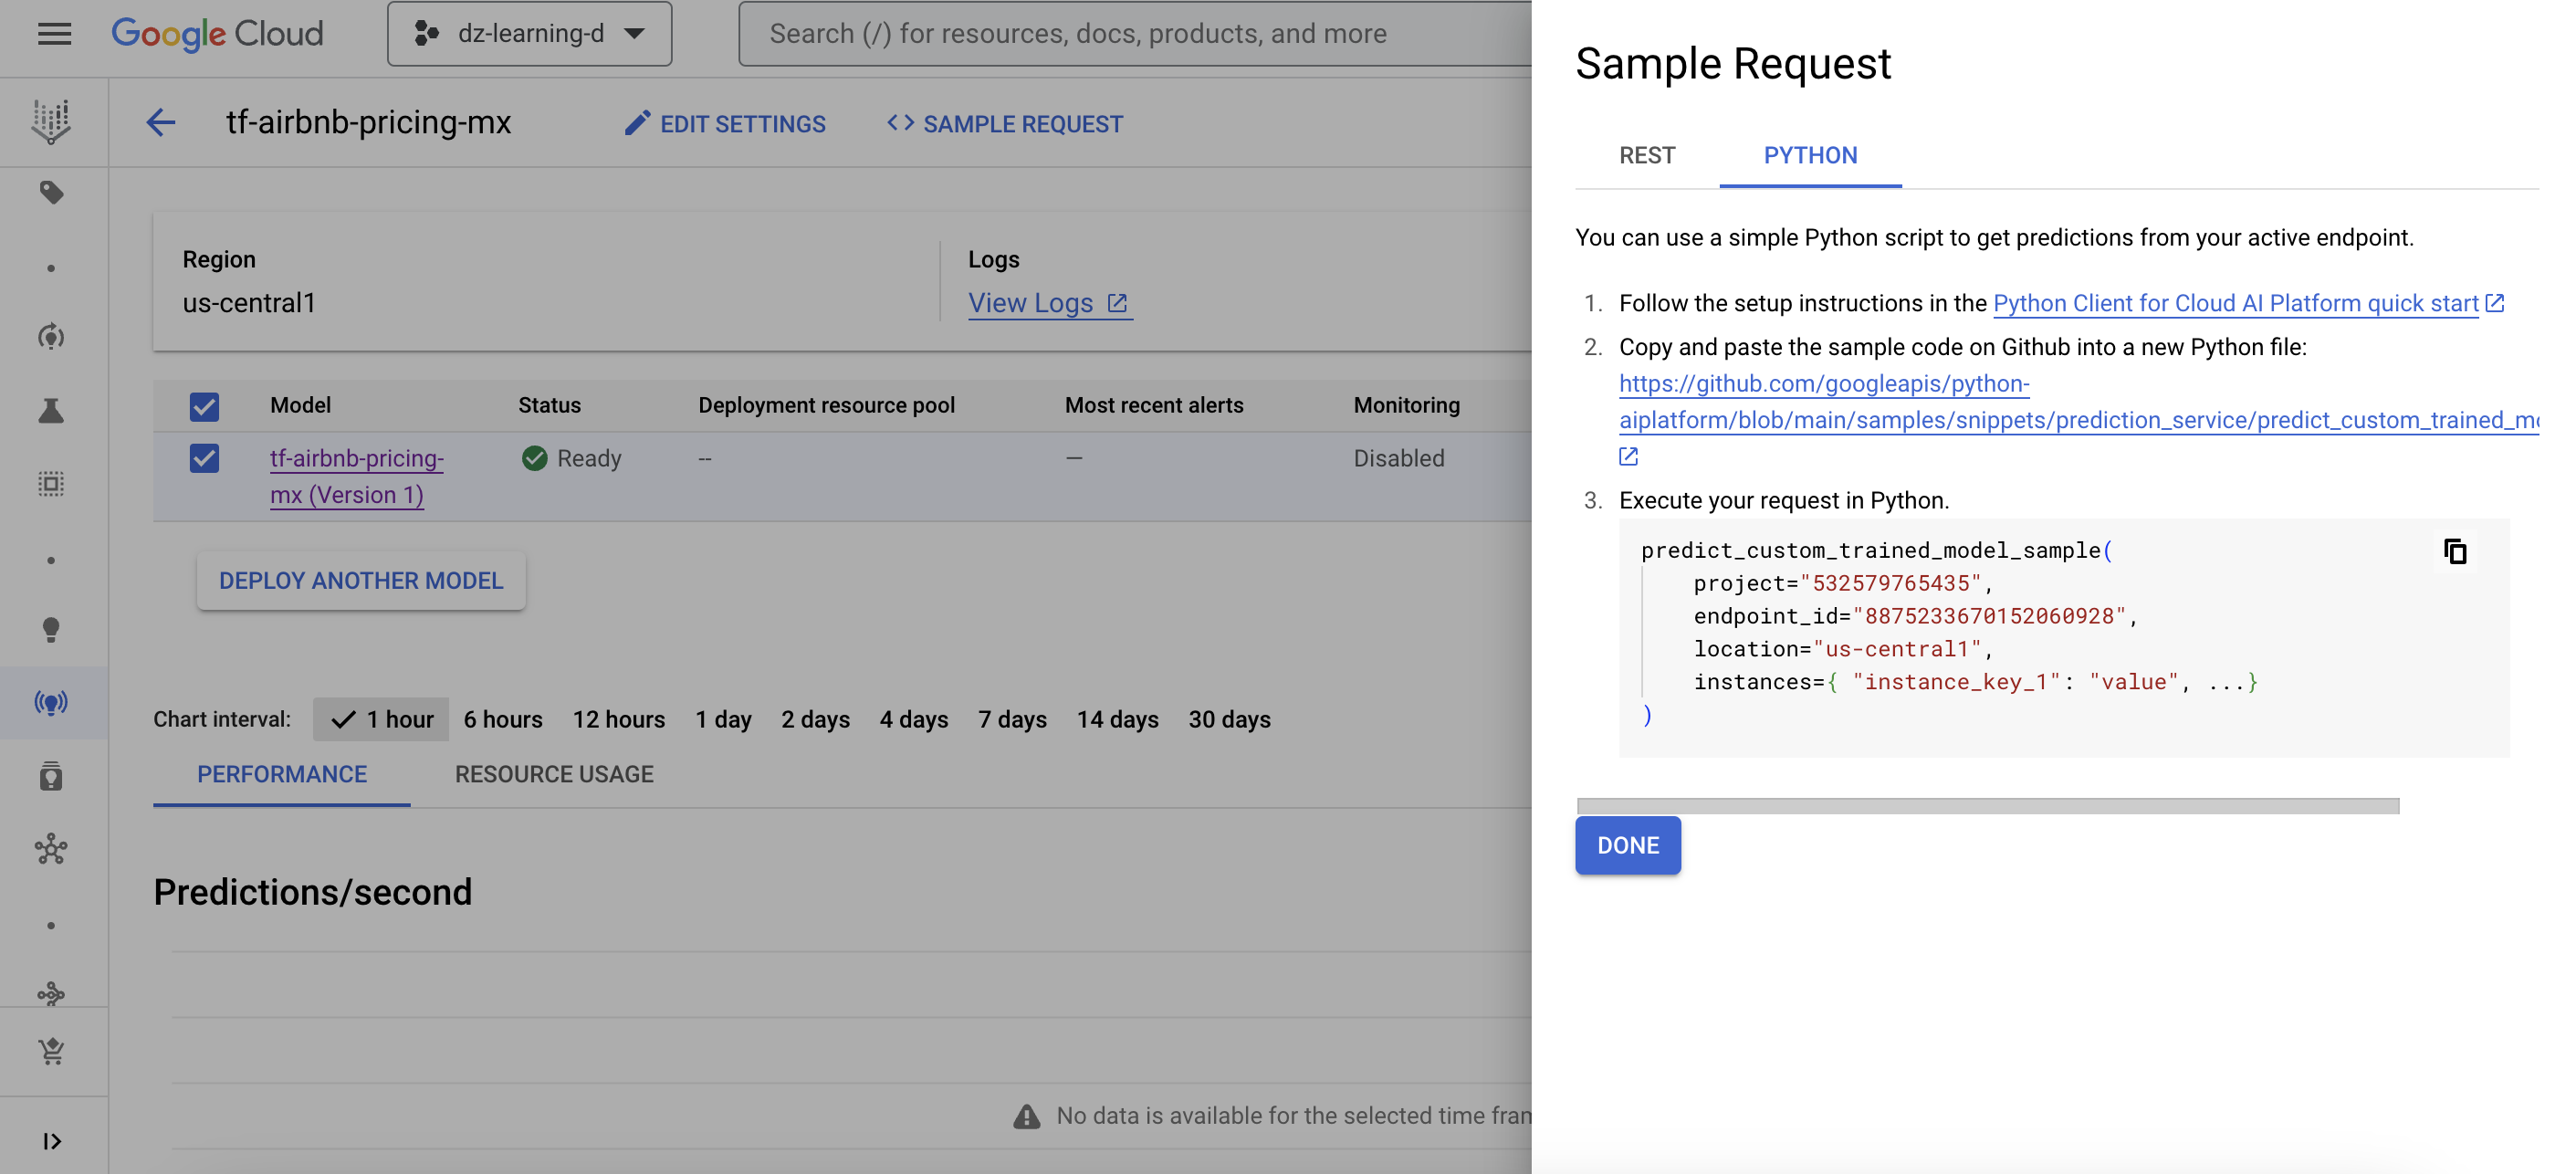

To make a request from another service you will need to create a Service Account and Grant Vertex user permission:

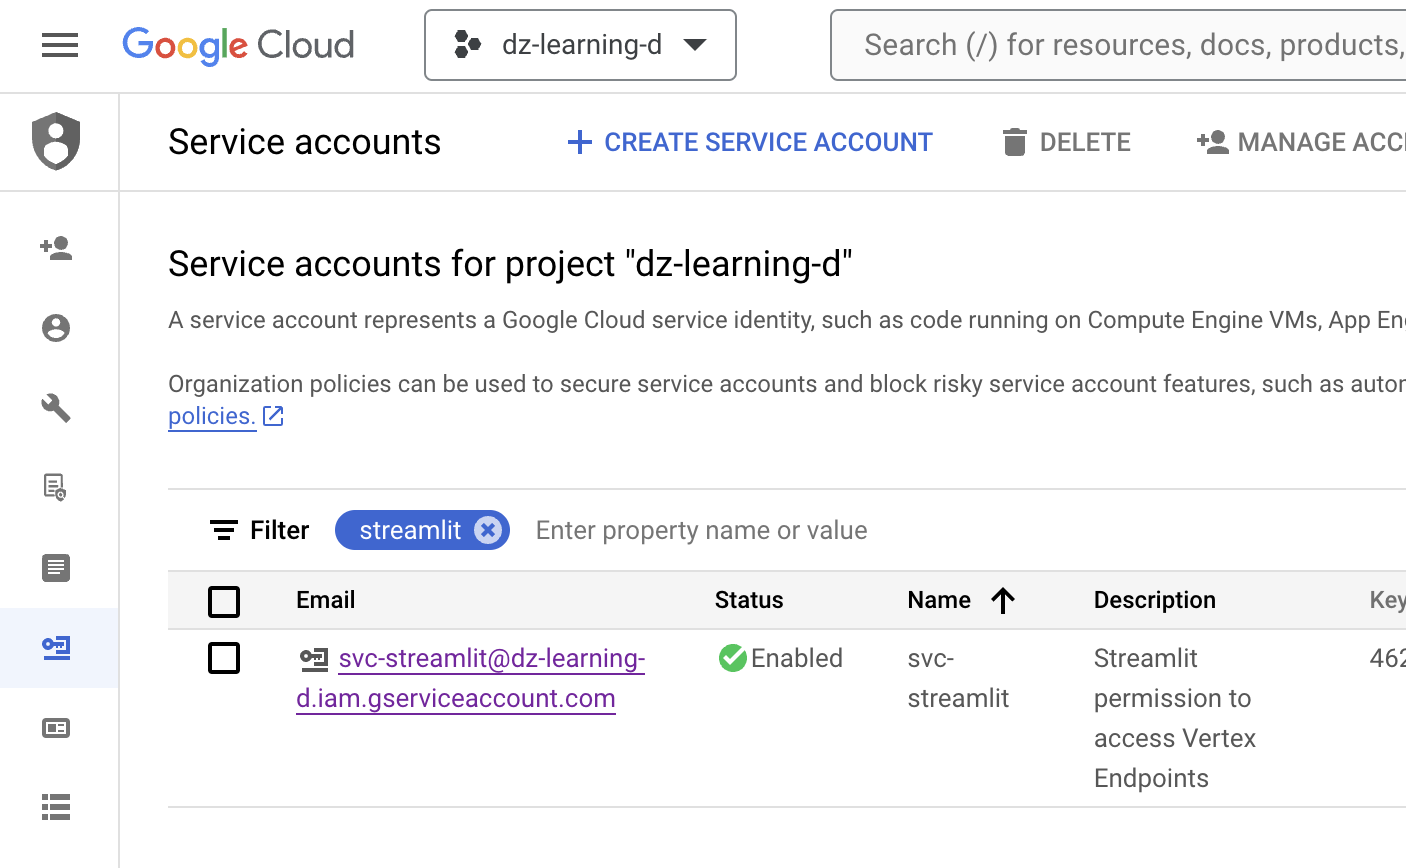

And then create a `.json` key that you can use to act in name of your newly created SA (remember to add this key file or the folder containing it to the `.gitignore` file as you don't want to publicly share your credentials):

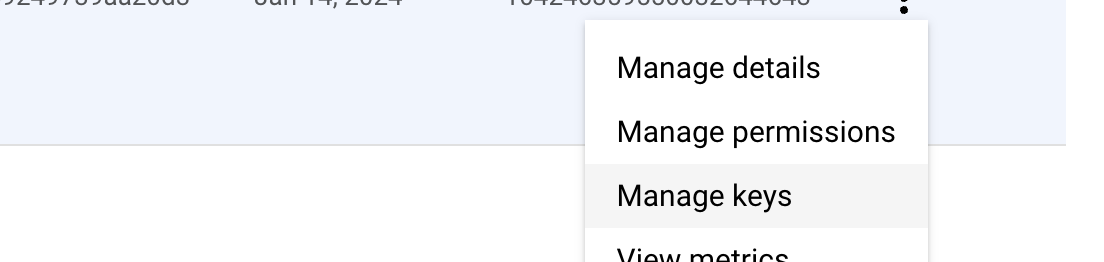

Then, we simply call our endpoint (alternative code using service account because we're testing the code we will use inside our streamlit app container):

In [11]:
import os
from google.cloud import aiplatform
from google.oauth2 import service_account

import json

In [12]:
# Create API client.
# service_account_info = json.load(open('../config/dz-learning-d-streamlit.json'))
# credentials = service_account.Credentials.from_service_account_info(
#     service_account_info # st.secrets["gcp_service_account"]
# )

In [13]:
endpoint_id = '3224482775197286400'
project="860047570819"
location="us-central1"

endpoint_name = f'projects/{project}/locations/{location}/endpoints/{endpoint_id}'
endpoint = aiplatform.Endpoint(endpoint_name=endpoint_name) #, credentials=credentials)

In [14]:
price_unit = np.exp(endpoint.predict(instances=[test_features_ordered.values[0].astype(np.float32).tolist()]).predictions[0][0])

In [15]:
price_unit

1152.4214657122834

All the previous images are proof that we deployed the model to the cloud with very simple steps. Again, all these steps can be performed programmatically as part of another system (automation pipeline, for example).

To use this endpoint from Streamlit Cloud, we need to add the credentials as "App Secrets".